This script that computes the correlation between trancript and protein expression at various drug exposures.

In [1]:
import pandas, scipy, seaborn, numpy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.family':'sans-serif',
                            'font.size':20, 
                            'xtick.labelsize':30, 
                            'ytick.labelsize':30, 
                            'figure.figsize':(16, 9), 
                            'axes.labelsize':40})

In [3]:
import mygene
mygenedb = mygene.MyGeneInfo()

# read proteome data

## four hours

In [4]:
four_input_file = '/home/adrian/projects/vigur/data/proteomics/HPMVEC_Proteomics_September_2022/HPMVECs_september2022_4h_all_prts_Relative_Quantification.csv'

In [5]:
metadata = {}

metadata['4h_control'] = ['20220905_ARNAR_010', '20220905_ARNAR_011', '20220905_ARNAR_035', '20220905_ARNAR_036', '20220905_ARNAR_058', '20220905_ARNAR_059']

metadata['4h_epi'] = ['20220905_ARNAR_004', '20220905_ARNAR_005', '20220905_ARNAR_008', '20220905_ARNAR_009', '20220905_ARNAR_051', '20220905_ARNAR_052']

metadata['4h_nor'] = ['20220905_ARNAR_013', '20220905_ARNAR_014', '20220905_ARNAR_019', '20220905_ARNAR_020', '20220905_ARNAR_044', '20220905_ARNAR_046']

metadata['4h_epinor'] = ['20220905_ARNAR_024', '20220905_ARNAR_025', '20220905_ARNAR_026', '20220905_ARNAR_027']

metadata['4h_TNFa'] = ['20220905_ARNAR_060', '20220905_ARNAR_065']

all_sample_names = [element for sublist in list(metadata.values()) for element in sublist]
print(len(all_sample_names))

24


In [6]:
df = pandas.read_csv(four_input_file, index_col=0, skiprows=2, sep=',')
sub = df[(df['Unique peptides'] >= 1) & (df['Confidence score'] >= 0)]
print(sub.shape)

working_labels = [label for label in sub.columns if label in all_sample_names]
proteome4 = sub.loc[:, working_labels]
print(proteome4.shape)
proteome4

(2528, 85)
(2528, 24)


,20220905_ARNAR_004,20220905_ARNAR_005,20220905_ARNAR_008,20220905_ARNAR_009,20220905_ARNAR_051,20220905_ARNAR_052,20220905_ARNAR_010,20220905_ARNAR_011,20220905_ARNAR_035,20220905_ARNAR_036,...,20220905_ARNAR_019,20220905_ARNAR_020,20220905_ARNAR_044,20220905_ARNAR_046,20220905_ARNAR_024,20220905_ARNAR_025,20220905_ARNAR_026,20220905_ARNAR_027,20220905_ARNAR_060,20220905_ARNAR_065
Accession,,,,,,,,,,,,,,,,,,,,,
Q86Y97,188.831525,197.069183,175.811650,207.531928,231.297300,180.455442,229.225909,260.583296,239.932247,269.642841,...,213.706837,220.596447,186.348364,164.313714,132.032811,152.621015,155.064497,144.703142,254.600648,288.285081
P07996,67637.285452,69193.314525,73301.239339,73046.035487,76848.532021,75864.367243,51202.056704,52324.792176,57746.065624,57305.252258,...,79871.651922,81503.165314,93321.622575,80580.904597,85574.535420,86860.325257,82302.374968,83774.323647,72500.337035,71473.184557
Q9BYC5,993.299560,919.843549,1003.355518,970.740256,990.124013,995.810114,1143.293690,1252.804708,1235.558835,1251.648153,...,763.500781,692.334917,704.935052,1004.723354,995.810528,968.034925,1064.621665,1053.354635,441.183414,705.386702
P17612,2638.744399,2648.816950,2900.393006,2814.013475,2488.508110,2875.469957,2022.530410,2073.314124,2099.639535,2120.887296,...,2591.592409,2738.611232,2836.111217,2346.707243,2928.801864,3004.747892,2737.224615,2911.889249,2304.086556,1916.376548
Q9NVA2,4838.918786,4948.784886,4805.636475,4859.048664,5117.803643,4985.957711,4799.790804,5048.907774,5604.874184,4896.368168,...,5265.460148,5220.962469,5119.458783,4922.648267,4945.733902,5109.131732,5033.384518,4997.031741,6211.176171,6262.321873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P11940,1962.088894,1923.127831,2025.458574,2013.108214,1941.504901,1987.857362,1704.298560,1695.877455,2060.147162,1745.239649,...,1863.187397,1950.825357,2231.139586,1904.520660,1965.128960,1996.112970,1866.102753,1894.433956,1892.050463,2168.747781
P16402,112.574011,109.101170,148.524786,111.826961,79.276300,22.890700,115.326000,91.787395,70.941235,90.731520,...,102.780835,120.558345,95.194574,70.346098,109.730414,80.549760,93.127875,101.555649,100.098035,81.454289
Q5T9S5,4286.287372,4360.436258,4392.948479,4495.368534,5653.666218,5691.976918,4479.781169,4814.740075,4328.139996,4084.019168,...,4617.046690,4679.230207,5153.364616,5659.209917,4992.276560,4937.083312,4674.033110,4687.569266,4099.772402,5160.915549


In [7]:
new_column_labels = {}
roots = []
for element in proteome4.columns:
    
    # determine the root
    for tag in metadata.keys():
        if element in metadata[tag]:
            root = tag
    roots.append(root)
    
    # determine the rank
    rank = roots.count(root)
    
    # full tag
    full_tag = root + '_' + str(rank)
    new_column_labels[element] = full_tag

# change the names
proteome4.rename(columns = new_column_labels, inplace=True)
proteome4

,4h_epi_1,4h_epi_2,4h_epi_3,4h_epi_4,4h_epi_5,4h_epi_6,4h_control_1,4h_control_2,4h_control_3,4h_control_4,...,4h_nor_3,4h_nor_4,4h_nor_5,4h_nor_6,4h_epinor_1,4h_epinor_2,4h_epinor_3,4h_epinor_4,4h_TNFa_1,4h_TNFa_2
Accession,,,,,,,,,,,,,,,,,,,,,
Q86Y97,188.831525,197.069183,175.811650,207.531928,231.297300,180.455442,229.225909,260.583296,239.932247,269.642841,...,213.706837,220.596447,186.348364,164.313714,132.032811,152.621015,155.064497,144.703142,254.600648,288.285081
P07996,67637.285452,69193.314525,73301.239339,73046.035487,76848.532021,75864.367243,51202.056704,52324.792176,57746.065624,57305.252258,...,79871.651922,81503.165314,93321.622575,80580.904597,85574.535420,86860.325257,82302.374968,83774.323647,72500.337035,71473.184557
Q9BYC5,993.299560,919.843549,1003.355518,970.740256,990.124013,995.810114,1143.293690,1252.804708,1235.558835,1251.648153,...,763.500781,692.334917,704.935052,1004.723354,995.810528,968.034925,1064.621665,1053.354635,441.183414,705.386702
P17612,2638.744399,2648.816950,2900.393006,2814.013475,2488.508110,2875.469957,2022.530410,2073.314124,2099.639535,2120.887296,...,2591.592409,2738.611232,2836.111217,2346.707243,2928.801864,3004.747892,2737.224615,2911.889249,2304.086556,1916.376548
Q9NVA2,4838.918786,4948.784886,4805.636475,4859.048664,5117.803643,4985.957711,4799.790804,5048.907774,5604.874184,4896.368168,...,5265.460148,5220.962469,5119.458783,4922.648267,4945.733902,5109.131732,5033.384518,4997.031741,6211.176171,6262.321873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P11940,1962.088894,1923.127831,2025.458574,2013.108214,1941.504901,1987.857362,1704.298560,1695.877455,2060.147162,1745.239649,...,1863.187397,1950.825357,2231.139586,1904.520660,1965.128960,1996.112970,1866.102753,1894.433956,1892.050463,2168.747781
P16402,112.574011,109.101170,148.524786,111.826961,79.276300,22.890700,115.326000,91.787395,70.941235,90.731520,...,102.780835,120.558345,95.194574,70.346098,109.730414,80.549760,93.127875,101.555649,100.098035,81.454289
Q5T9S5,4286.287372,4360.436258,4392.948479,4495.368534,5653.666218,5691.976918,4479.781169,4814.740075,4328.139996,4084.019168,...,4617.046690,4679.230207,5153.364616,5659.209917,4992.276560,4937.083312,4674.033110,4687.569266,4099.772402,5160.915549


## twentyfour

In [8]:
twentyfour_input_file = '/home/adrian/projects/vigur/data/proteomics/HPMVEC_Proteomics_September_2022/HPMVECs_september2022_24h_all_prts_Relative_Quantification.csv'

In [9]:
metadata = {}

metadata['24h_control'] = ['20220905_ARNAR_022', '20220905_ARNAR_023', '20220905_ARNAR_037', '20220905_ARNAR_038', '20220905_ARNAR_067', '20220905_ARNAR_068']

metadata['24h_epi'] = ['20220905_ARNAR_031', '20220905_ARNAR_040']

metadata['24h_nor'] = ['20220905_ARNAR_028', '20220905_ARNAR_053', '20220905_ARNAR_054', '20220905_ARNAR_062']

metadata['24h_epinor'] = ['20220905_ARNAR_006', '20220905_ARNAR_007', '20220905_ARNAR_033', '20220905_ARNAR_034', '20220905_ARNAR_055']

metadata['24h_TNFa'] = ['20220905_ARNAR_015', '20220905_ARNAR_016', '20220905_ARNAR_017', '20220905_ARNAR_018', '20220905_ARNAR_042', '20220905_ARNAR_043']

all_sample_names = [element for sublist in list(metadata.values()) for element in sublist]
print(len(all_sample_names))

23


In [10]:
df = pandas.read_csv(twentyfour_input_file, index_col=0, skiprows=2, sep=',')
sub = df[(df['Unique peptides'] >= 1) & (df['Confidence score'] >= 0)]
print(sub.shape)

working_labels = [label for label in sub.columns if label in all_sample_names]
proteome24 = sub.loc[:, working_labels]
print(proteome24.shape)
proteome24

(2241, 83)
(2241, 23)


,20220905_ARNAR_022,20220905_ARNAR_023,20220905_ARNAR_037,20220905_ARNAR_038,20220905_ARNAR_067,20220905_ARNAR_068,20220905_ARNAR_015,20220905_ARNAR_016,20220905_ARNAR_017,20220905_ARNAR_018,...,20220905_ARNAR_040,20220905_ARNAR_028,20220905_ARNAR_053,20220905_ARNAR_054,20220905_ARNAR_062,20220905_ARNAR_006,20220905_ARNAR_007,20220905_ARNAR_033,20220905_ARNAR_034,20220905_ARNAR_055
Accession,,,,,,,,,,,,,,,,,,,,,
P05362,4500.598231,4378.032103,4103.905474,4349.892617,4279.145370,4059.749451,33384.566580,33997.113878,27707.013842,28891.362368,...,4601.467327,4167.812372,4514.581888,4553.483464,4485.795989,4736.503557,4617.065213,4333.807381,4249.812067,4434.874940
P00918,8.644058,14.547096,15.499945,4.900813,4.983991,4.281299,9.437474,4.971067,7.868419,4.071027,...,821.030266,424.079015,681.712699,543.632922,723.938589,451.366466,438.010321,643.725430,576.840183,616.884877
Q00005,910.722708,987.334559,1000.936648,945.670561,1032.269871,1001.446530,943.296047,868.336533,929.361034,1026.579492,...,1184.390168,937.523077,898.968767,859.001655,860.516883,1490.200912,1405.411814,1799.564829,1642.424500,1495.606091
P07093,878.272606,768.908487,852.618127,834.944582,1022.914933,805.596743,546.289422,557.282958,655.218905,557.330669,...,1493.498850,1154.893028,1366.130831,1223.722939,1460.684138,1095.431615,1122.829533,1152.472061,1121.003202,1423.883003
Q8N0U7,760.572720,643.716967,855.054111,592.751551,517.169568,524.330666,513.643415,514.884726,561.936597,535.790324,...,2003.565128,1398.912164,2141.095248,1663.856364,1644.593915,1029.760065,995.984036,1200.862495,1135.126518,1071.910379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9NTJ4,7259.288240,7238.468687,7922.619466,8626.455291,8238.897366,8155.931836,7038.226691,7145.379722,7009.746380,7180.604334,...,7654.020459,7852.081194,8180.034131,8759.150223,7895.110300,6629.936533,6879.976096,8416.793417,8651.998277,9676.204551
P60981,7908.695431,7912.697340,7411.488789,7558.075080,8550.230714,7987.524956,7526.372261,6699.314496,7214.082762,7512.507457,...,7914.699938,7562.831023,8105.309835,7495.572451,7688.882526,7518.767710,7128.702665,8399.912294,7642.591405,7517.024368
Q8TBY8,1837.029972,1721.511487,1443.883647,1617.506677,1587.763375,1411.691305,1471.332147,1352.705617,1735.056591,1628.035230,...,1733.016500,1843.134607,1545.688364,1497.760078,1508.632108,1446.885058,1478.890775,1846.348973,1719.370065,1567.048757


In [11]:
new_column_labels = {}
roots = []
for element in proteome24.columns:
    
    # determine the root
    for tag in metadata.keys():
        if element in metadata[tag]:
            root = tag
    roots.append(root)
    
    # determine the rank
    rank = roots.count(root)
    
    # full tag
    full_tag = root + '_' + str(rank)
    new_column_labels[element] = 'p_' + full_tag

# change the names
proteome24.rename(columns = new_column_labels, inplace=True)
proteome24

,p_24h_control_1,p_24h_control_2,p_24h_control_3,p_24h_control_4,p_24h_control_5,p_24h_control_6,p_24h_TNFa_1,p_24h_TNFa_2,p_24h_TNFa_3,p_24h_TNFa_4,...,p_24h_epi_2,p_24h_nor_1,p_24h_nor_2,p_24h_nor_3,p_24h_nor_4,p_24h_epinor_1,p_24h_epinor_2,p_24h_epinor_3,p_24h_epinor_4,p_24h_epinor_5
Accession,,,,,,,,,,,,,,,,,,,,,
P05362,4500.598231,4378.032103,4103.905474,4349.892617,4279.145370,4059.749451,33384.566580,33997.113878,27707.013842,28891.362368,...,4601.467327,4167.812372,4514.581888,4553.483464,4485.795989,4736.503557,4617.065213,4333.807381,4249.812067,4434.874940
P00918,8.644058,14.547096,15.499945,4.900813,4.983991,4.281299,9.437474,4.971067,7.868419,4.071027,...,821.030266,424.079015,681.712699,543.632922,723.938589,451.366466,438.010321,643.725430,576.840183,616.884877
Q00005,910.722708,987.334559,1000.936648,945.670561,1032.269871,1001.446530,943.296047,868.336533,929.361034,1026.579492,...,1184.390168,937.523077,898.968767,859.001655,860.516883,1490.200912,1405.411814,1799.564829,1642.424500,1495.606091
P07093,878.272606,768.908487,852.618127,834.944582,1022.914933,805.596743,546.289422,557.282958,655.218905,557.330669,...,1493.498850,1154.893028,1366.130831,1223.722939,1460.684138,1095.431615,1122.829533,1152.472061,1121.003202,1423.883003
Q8N0U7,760.572720,643.716967,855.054111,592.751551,517.169568,524.330666,513.643415,514.884726,561.936597,535.790324,...,2003.565128,1398.912164,2141.095248,1663.856364,1644.593915,1029.760065,995.984036,1200.862495,1135.126518,1071.910379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9NTJ4,7259.288240,7238.468687,7922.619466,8626.455291,8238.897366,8155.931836,7038.226691,7145.379722,7009.746380,7180.604334,...,7654.020459,7852.081194,8180.034131,8759.150223,7895.110300,6629.936533,6879.976096,8416.793417,8651.998277,9676.204551
P60981,7908.695431,7912.697340,7411.488789,7558.075080,8550.230714,7987.524956,7526.372261,6699.314496,7214.082762,7512.507457,...,7914.699938,7562.831023,8105.309835,7495.572451,7688.882526,7518.767710,7128.702665,8399.912294,7642.591405,7517.024368
Q8TBY8,1837.029972,1721.511487,1443.883647,1617.506677,1587.763375,1411.691305,1471.332147,1352.705617,1735.056591,1628.035230,...,1733.016500,1843.134607,1545.688364,1497.760078,1508.632108,1446.885058,1478.890775,1846.348973,1719.370065,1567.048757


## join both 4 and 24 h

In [12]:
proteome = proteome4.join(proteome24, how='inner')
print(proteome.shape)

(1663, 47)


In [13]:
intersect  = set(proteome4.index) & set(proteome24.index)
print(len(intersect))

1663


In [14]:
proteome

,4h_epi_1,4h_epi_2,4h_epi_3,4h_epi_4,4h_epi_5,4h_epi_6,4h_control_1,4h_control_2,4h_control_3,4h_control_4,...,p_24h_epi_2,p_24h_nor_1,p_24h_nor_2,p_24h_nor_3,p_24h_nor_4,p_24h_epinor_1,p_24h_epinor_2,p_24h_epinor_3,p_24h_epinor_4,p_24h_epinor_5
Accession,,,,,,,,,,,,,,,,,,,,,
P07996,67637.285452,69193.314525,73301.239339,73046.035487,76848.532021,75864.367243,51202.056704,52324.792176,57746.065624,57305.252258,...,230789.552293,267627.367336,241854.448927,248294.562014,248897.715761,148947.368109,152465.038006,242514.692880,233339.660536,240174.648466
Q9BYC5,993.299560,919.843549,1003.355518,970.740256,990.124013,995.810114,1143.293690,1252.804708,1235.558835,1251.648153,...,4515.176613,3634.238552,4931.641539,5151.780170,4241.390840,3196.066525,3350.779374,4890.607166,4777.834576,4737.674172
P17612,2638.744399,2648.816950,2900.393006,2814.013475,2488.508110,2875.469957,2022.530410,2073.314124,2099.639535,2120.887296,...,14791.315176,13892.963049,15190.196002,14576.541160,15503.391382,9691.592706,9649.571060,14331.587771,13903.811274,15397.257098
Q9NVA2,4838.918786,4948.784886,4805.636475,4859.048664,5117.803643,4985.957711,4799.790804,5048.907774,5604.874184,4896.368168,...,372.405707,207.313395,290.212010,208.099725,329.642903,377.606223,368.121682,267.152415,300.126811,271.921569
P09382,67550.002848,71004.179839,71110.119555,73362.745496,84656.018661,83967.617668,74501.696351,74569.682940,95214.815551,94194.599276,...,112008.896686,125164.268781,117015.300665,117241.098308,111457.365034,71611.106947,72898.043843,108434.284426,103326.256311,117118.758135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q8N283,6673.548446,6301.716693,6179.773380,6280.999722,13317.350223,11741.780511,7962.679886,7515.640520,9963.385650,8712.015475,...,1078.861271,1002.803203,879.989593,817.150671,813.609993,974.285928,947.286383,1132.034544,1129.090029,874.551353
P16402,112.574011,109.101170,148.524786,111.826961,79.276300,22.890700,115.326000,91.787395,70.941235,90.731520,...,7469.847839,6946.525230,8988.982929,8954.285821,9129.035491,4934.280409,5132.393717,7379.526380,7042.074050,8267.868811
Q5T9S5,4286.287372,4360.436258,4392.948479,4495.368534,5653.666218,5691.976918,4479.781169,4814.740075,4328.139996,4084.019168,...,1019.792641,1229.885692,1081.952704,1171.702608,1034.598617,1174.138199,1213.505786,1144.106105,1167.059916,1057.239888


# determine proteins for which we have gene IDs

In [15]:
expression_file = '/home/adrian/projects/vigur/results/sequencing/tpm/DESeq2_TPM_values.tsv'

In [16]:
expression = pandas.read_csv(expression_file, index_col=0, sep='\t')
print(expression.shape)
expression.head()

(40320, 96)


,072_159,072_160,072_161,072_162,072_163,072_164,072_165,072_166,072_167,072_168,...,073_73,073_74,073_75,073_76,073_77,073_78,073_79,073_80,073_81,073_82
ENSG00000000003,33.913270,36.925924,34.300713,34.066671,39.539143,35.387464,37.382210,37.271017,44.412056,36.546054,...,38.878165,34.539854,36.341524,36.358163,35.662062,39.354423,36.897123,40.268850,40.243493,39.279878
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.070305,0.000000,0.042654,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,57.479592,60.383467,70.469104,76.421934,81.956683,80.662585,75.102084,75.548661,85.646220,76.686500,...,49.313600,74.750882,73.621733,88.938917,84.652970,78.607037,77.642204,78.861113,74.648598,56.894679
ENSG00000000457,4.152165,3.688847,5.083191,5.851081,5.013459,4.998895,4.943423,5.759294,5.797407,4.996733,...,3.751108,4.686774,4.408532,4.283488,5.221377,4.081310,4.327263,4.538531,4.417790,3.793313
ENSG00000000460,11.709865,11.232057,10.623214,10.214623,10.217977,10.546670,9.608664,8.750641,9.234168,8.759522,...,4.732061,4.222485,3.397340,3.719525,3.375133,3.705756,3.933664,3.627546,3.490585,5.726682


In [18]:
def uniprot2ensembl_mapper(split):
    
    incidents = []
    entrezid = None; ensemblid = None
    
    # mapping to entrez
    if len(mygenedb.query(split)['hits']) == 0:
        pass
    elif len(mygenedb.query(split)['hits']) == 1:
        entrezid = mygenedb.query(split)['hits'][0]['_id']
    else:
        #print('\t {}'.format(mygenedb.query(split)['hits']))
        entrezid = mygenedb.query(split)['hits'][0]['_id']
        #print('\t WARNING: multiple entezid mapping, selecting the first: {}'.format(entrezid))
    
    # from entrez to ensembl
    if entrezid != None:
        #print(f'\t working with {entrezid}')
        call = mygenedb.getgene(entrezid, fields='ensembl')
        if 'ensembl' in call:
            hits = call['ensembl']
            if type(hits) == dict:
                ensemblid = hits['gene']
                if ensemblid in expression.index:
                    incidents.append(ensemblid)
                else:
                    print(f'\t ENSEMBL ID {ensemblid} not found.')
            elif type(hits) == list:
                #print(len(hits), hits)
                for hit in hits:
                    ensemblid = hit['gene']
                    if ensemblid in expression.index:
                        incidents.append(ensemblid)
                    else:
                        print(f'\t ENSEMBL ID {ensemblid} not found in expression')
            else:
                print(call)
                print('\t WARNING: Data type not detected.')
        
    return incidents

#
# main
#
rosetta = {}
for element in proteome.index:
    #print(element)
    
    rosetta[element] = []
    
    # split identifiers
    splitted_tag = element.split(';')
    for split in splitted_tag:
        incidents = uniprot2ensembl_mapper(split)
        for incident in incidents:
            rosetta[element].append(incident)
    
    # deal with mapping options
    if len(rosetta[element]) == 0:
        #print(f'dropping Uniprot {element} for lack of mapping')
        del rosetta[element]
    
    elif len(rosetta[element]) > 1:
        #print(rosetta[element])
        #print(f'{element} mapps to {incidents}. Selecting first')
        rosetta[element] = rosetta[element][:1]
        #print(rosetta[element])   
    
    
    #else:
        
        # informative print
        #print(f'final mapping {rosetta[element]}')
        
    #print()
    
new_rosetta = {}
for uniprot in rosetta:
    new_rosetta[uniprot] = rosetta[uniprot][0]
rosetta = new_rosetta
inverse_rosetta = {v: k for k, v in rosetta.items()}

	 working with 7057
	 working with 2530
	 working with 5566
	 ENSEMBL ID ENSG00000288516 not found in expression
	 working with 55752
	 working with 3956
	 working with 1347
	 working with 2202
	 working with 5251
	 working with 3875
	 working with 2280
	 working with 3958
	 working with 64283
	 working with 6228
	 working with 975
	 working with 3182
	 working with 196374
	 working with 23589
	 working with 4907
	 working with 2805
	 working with 4643
	 working with 11260
	 working with 6147
	 working with 4733
	 working with 2052
	 working with 2022
	 working with 7798
	 working with 23474
	 working with 80777
	 working with 84817
	 working with 23450
	 working with 27030
	 working with 27339
	 working with 8574
	 working with 220988
	 working with 1665
	 working with 3094
	 working with 3880
	 working with 5519
	 working with 9987
	 working with 8575
	 working with 143
	 working with 2896
	 working with 3927
	 working with 83442
	 working with 10946
	 working with 55970
	 working wi

	 working with 71
	 working with 60
	 working with 645
	 working with 8407
	 working with 55612
	 working with 9380
	 working with 3313
	 working with 5935
	 working with 5917
	 working with 3417
	 working with 23023
	 working with 65108
	 working with 10672
	 working with 445815
	 working with 54662
	 working with 708
	 working with 3340
	 working with 10765
	 working with 3241
	 working with 3208
	 working with 54890
	 working with 8541
	 working with 57488
	 working with 10574
	 working with 23191
	 ENSEMBL ID ENSG00000288461 not found in expression
	 working with 8634
	 working with 6135
	 working with 2821
	 working with 390616
	 working with 2108
	 working with 201595
	 working with 5791
	 working with 53358
	 working with 10652
	 working with 5687
	 working with 2548
	 working with 1984
	 ENSEMBL ID ENSG00000288145 not found in expression
	 working with 143244
	 working with 7353
	 working with 388743
	 working with 29927
	 working with 89796
	 working with 5243
	 working with 3

	 working with 322
	 working with 10531
	 working with 23336
	 working with 8500
	 ENSEMBL ID ENSG00000288198 not found in expression
	 working with 50865
	 working with 25932
	 working with 10131
	 working with 10094
	 working with 56648
	 working with 6281
	 working with 1783
	 working with 8934
	 working with 3685
	 working with 11344
	 working with 3611
	 working with 23325
	 working with 4736
	 working with 50809
	 working with 9646
	 working with 3396
	 working with 2287
	 working with 5880
	 working with 5881
	 working with 54922
	 working with 11198
	 working with 382
	 working with 5230
	 working with 2956
	 working with 4720
	 working with 9601
	 working with 5706
	 working with 908
	 working with 5962
	 working with 290
	 working with 140807
	 working with 6749
	 working with 81567
	 working with 9648
	 working with 9168
	 working with 2744
	 working with 3308
	 working with 6499
	 working with 11047
	 working with 2820
	 working with 158401
	 working with 5213
	 working wit

	 working with 26164
	 working with 3615
	 working with 127795
	 working with 10213
	 working with 51084
	 working with 6726
	 working with 125058
	 working with 54862
	 ENSEMBL ID ENSG00000288293 not found in expression
	 working with 54464
	 working with 5685
	 working with 85379
	 working with 4869
	 working with 6059
	 working with 374666
	 working with 100287171
	 working with 653440
	 working with 9689
	 working with 817
	 working with 10227
	 working with 8667
	 working with 5420
	 working with 127254
	 working with 57697
	 working with 5829
	 working with 6208
	 working with 9782
	 working with 7448
	 working with 3428
	 working with 5521
	 working with 6277
	 working with 7965
	 working with 5530
	 working with 6201
	 working with 23603
	 working with 54433
	 working with 4141
	 working with 6717
	 working with 7045
	 working with 116984
	 working with 328
	 working with 6119
	 working with 1676
	 working with 37
	 working with 55660
	 working with 1973
	 working with 1974
	 w

	 working with 3915
	 working with 5110
	 working with 285590
	 working with 6144
	 working with 8453
	 working with 9897
	 working with 6839
	 working with 6611
	 working with 2739
	 working with 246181
	 working with 64841
	 working with 5721
	 working with 515
	 working with 9320
	 working with 1650
	 working with 10016
	 working with 1073
	 working with 9690
	 working with 25923
	 working with 10092
	 working with 1374
	 working with 396
	 working with 23406
	 working with 57142
	 working with 30845
	 working with 51065
	 working with 6097
	 working with 4744
	 working with 5510
	 working with 10694
	 working with 22824
	 working with 6123
	 working with 5865
	 working with 80727
	 working with 51031
	 working with 90957
	 working with 55161
	 working with 399687
	 working with 2947
	 working with 6184
	 working with 1666
	 working with 7458
	 working with 56886
	 working with 5604
	 working with 9801
	 working with 9994
	 ENSEMBL ID ENSG00000288475 not found in expression
	 workin

	 working with 6632
	 working with 8653
	 working with 9632
	 working with 9862
	 working with 6169
	 working with 389
	 working with 9662
	 working with 1956
	 working with 2582
	 working with 8476
	 working with 28971
	 working with 2040
	 working with 29957
	 working with 2590
	 working with 23637
	 working with 64135
	 working with 2109
	 working with 22852
	 working with 5272
	 working with 157708
	 working with 11224
	 working with 8607
	 working with 65080
	 working with 7037
	 working with 4343
	 working with 11343
	 working with 8907
	 working with 10910
	 working with 6451
	 working with 6710
	 working with 10397
	 working with 3294
	 [{'_id': '7335', '_score': 8.019804, 'entrezgene': '7335', 'name': 'ubiquitin conjugating enzyme E2 V1', 'symbol': 'UBE2V1', 'taxid': 9606}, {'_id': '387522', '_score': 1.591898, 'entrezgene': '387522', 'name': 'PEDS1-UBE2V1 readthrough', 'symbol': 'PEDS1-UBE2V1', 'taxid': 9606}]
	 working with 7335
	 working with 7336
	 working with 3655
	 work

In [19]:
print(proteome.shape)
print(len(rosetta)) 

(1663, 47)
1651


In [20]:
missing_proteins = [element for element in proteome.index if element not in rosetta.keys()]
print(missing_proteins)

['A0A2R8Y422', 'Q5JSZ5', 'Q58FG1', 'O00370', 'Q8IVE0', 'Q58FG0', 'Q58FF8', 'B2RPK0', 'Q58FF6', 'O60361', 'Protein', 'P0C7V7']


In [21]:
proteome.drop(missing_proteins, axis=0, inplace=True)
proteome.sort_index(inplace=True)
print(proteome.shape)
proteome

(1651, 47)


,4h_epi_1,4h_epi_2,4h_epi_3,4h_epi_4,4h_epi_5,4h_epi_6,4h_control_1,4h_control_2,4h_control_3,4h_control_4,...,p_24h_epi_2,p_24h_nor_1,p_24h_nor_2,p_24h_nor_3,p_24h_nor_4,p_24h_epinor_1,p_24h_epinor_2,p_24h_epinor_3,p_24h_epinor_4,p_24h_epinor_5
Accession,,,,,,,,,,,,,,,,,,,,,
A0A0B4J2E5;Q15269,1250.972978,1211.885918,1214.619135,1273.527042,1382.986156,1256.042512,1197.828327,1246.634942,1385.903294,1381.211516,...,1109.675096,763.667795,968.342319,1002.636078,1152.316805,809.565067,807.000994,817.700661,744.318030,952.925177
A0A1B0GUS4,345.322335,251.677736,337.284242,348.980819,524.584277,420.337739,517.005251,523.791087,692.892920,570.849889,...,1222.976741,475.113384,714.263807,397.787558,952.620194,305.688467,289.905899,371.362447,418.265297,367.511473
A0A2R8Y4L2,5665.565644,5796.569434,6097.408384,6165.381541,9780.613618,8867.453592,6444.065769,6566.153783,11040.983547,10848.701249,...,8388.431707,6572.809458,6366.790335,6173.617355,7473.135313,5455.023110,5583.708652,6558.694449,6583.366987,7031.815269
A0AVT1,2773.264034,2808.082317,2936.901075,2703.875644,4370.496738,3946.055422,2882.583573,3061.999963,3884.607120,3898.556935,...,1296.642544,960.076082,918.160735,875.267834,1234.077962,850.933584,850.870533,821.212096,885.263050,890.497755
A0FGR8,3447.804201,3496.473839,3190.986479,3196.773343,4850.066406,4144.859933,3847.320924,4011.733781,4612.879965,5032.983658,...,1284.243380,1245.896884,1554.322688,1525.747731,1439.875883,1346.703787,1425.835537,1639.600723,1704.442763,1754.086234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6B6,2669.692168,2615.039684,3057.882205,3042.516647,3261.284965,3195.034685,3002.009227,3143.068389,3608.340277,3228.281693,...,4397.558702,3618.581550,4272.893965,4046.825154,4132.586886,3350.254724,3334.987436,3973.792144,3977.274485,4508.207628
Q9Y6C9,3026.361608,3275.486510,2825.363867,2900.126128,4490.632951,4026.349618,3367.039233,3663.675089,4725.158919,4502.031777,...,2745.951547,2550.412350,2480.422404,2496.396932,2776.518685,1952.507378,1864.548224,2394.914403,2319.736961,2415.256898
Q9Y6E2,8672.525867,8901.175747,9712.766858,9974.511136,11345.508910,10647.559080,7521.319249,7333.860615,7339.282835,6850.782197,...,15112.067572,25959.459943,13630.705659,14170.828475,15292.012858,13162.221958,12953.311896,13732.956935,13296.973429,15865.298041


# read expression

In [22]:
geneids = [rosetta[element] for element in rosetta.keys()]
print(geneids[:10])

['ENSG00000137801', 'ENSG00000033170', 'ENSG00000072062', 'ENSG00000138758', 'ENSG00000100097', 'ENSG00000112695', 'ENSG00000115380', 'ENSG00000102174', 'ENSG00000111057', 'ENSG00000088832']


In [23]:
# slice the genes we are interested
selected_expression = expression.loc[geneids,:]

In [24]:
# change it to protein names
selected_expression.rename(index=inverse_rosetta, inplace=True)
print(selected_expression.shape)
selected_expression.head()

(1651, 96)


,072_159,072_160,072_161,072_162,072_163,072_164,072_165,072_166,072_167,072_168,...,073_73,073_74,073_75,073_76,073_77,073_78,073_79,073_80,073_81,073_82
P07996,2192.290000,1929.800000,3401.954000,3675.705000,4409.407000,4203.218000,4590.126000,4701.106000,4669.764000,4548.487000,...,2311.418000,4193.032000,4232.120000,4495.247000,4390.095000,3231.561000,3247.559000,2692.579000,2843.937000,2033.822000
Q9BYC5,126.632870,126.399312,130.651248,137.988704,106.793030,112.426021,106.413172,104.104712,100.590087,99.688813,...,138.778567,141.987328,140.785480,114.938211,119.233869,100.404949,93.518292,104.000837,108.796550,122.186698
P17612,69.565231,66.703959,77.486498,80.874756,74.993793,76.149430,76.839280,74.656027,78.428218,73.083453,...,74.841897,78.560484,77.887675,74.185660,74.184462,69.956730,67.012264,69.321464,67.539131,76.659836
Q9NVA2,100.504000,97.232050,108.898700,109.207900,104.915000,95.753020,93.527250,96.984750,112.325200,95.400850,...,97.496270,114.713800,115.181800,108.037100,101.419100,98.718480,91.026080,99.887740,109.138400,106.856200
P09382,3962.526000,4088.257000,4047.986000,3609.929000,2955.450000,3390.074000,3393.209000,3250.685000,3228.746000,3216.499000,...,5279.717000,4836.180000,5120.063000,4507.954000,4541.115000,4758.471000,5317.490000,4439.718000,4450.183000,5001.358000


In [25]:
# subset and label conditions

In [26]:
metadata_file = '/home/adrian/projects/vigur/data/sequencing/metadata/metadata.tsv'
metadata = pandas.read_csv(metadata_file, sep='\t')
metadata = metadata.loc[metadata['time'] != 'zero', :]
metadata = metadata.loc[metadata['treatment'] != 'mix_plus_ilo', :]
metadata = metadata.loc[metadata['treatment'] != 'ilo_only', :]
metadata

,run,sampleID,experiment,time,treatment,replicate
2,72,072_71,1,four,zero,1
3,72,072_72,1,four,zero,2
4,72,072_73,1,four,five_epi,1
5,72,072_74,1,four,five_epi,2
6,72,072_75,1,four,five_nor,1
...,...,...,...,...,...,...
81,73,073_78,2,four,mix,2
88,73,073_116,3,four,zero,1
89,73,073_117,3,four,zero,2
90,73,073_118,3,four,mix,1


In [27]:
metadata_mapper = {}
for index, row in metadata.iterrows():
    new_label = '{}_{}_{}_{}_{}'.format(row['run'], row['experiment'], row['time'], row['treatment'], row['replicate'])
    metadata_mapper[row['sampleID']] = new_label

In [28]:
selected_expression.rename(columns=metadata_mapper, inplace=True)
dropping_samples = [sample for sample in selected_expression.columns if ('072' in sample) or ('073' in sample)]
print(dropping_samples)
selected_expression.drop(dropping_samples, axis=1, inplace=True)
print(selected_expression.shape)
print(selected_expression.columns)
selected_expression.sort_index(inplace=True)
selected_expression

['072_159', '072_160', '072_249', '072_250', '072_69', '072_70', '073_114', '073_115', '073_120', '073_121', '073_122', '073_123', '073_32', '073_33', '073_38', '073_39', '073_40', '073_41', '073_73', '073_74', '073_79', '073_80', '073_81', '073_82']
(1651, 72)
Index(['72_2_four_zero_1', '72_2_four_zero_2', '72_2_four_five_epi_1',
       '72_2_four_five_epi_2', '72_2_four_five_nor_1', '72_2_four_five_nor_2',
       '72_2_four_mix_1', '72_2_four_mix_2', '72_2_four_TNFa_1',
       '72_2_four_TNFa_2', '72_2_twentyfour_zero_1', '72_2_twentyfour_zero_2',
       '72_2_twentyfour_five_epi_1', '72_2_twentyfour_five_epi_2',
       '72_2_twentyfour_five_nor_1', '72_2_twentyfour_five_nor_2',
       '72_2_twentyfour_mix_1', '72_2_twentyfour_mix_2',
       '72_2_twentyfour_TNFa_1', '72_2_twentyfour_TNFa_2', '72_3_four_zero_1',
       '72_3_four_zero_2', '72_3_four_five_epi_1', '72_3_four_five_epi_2',
       '72_3_four_five_nor_1', '72_3_four_five_nor_2', '72_3_four_mix_1',
       '72_3_four_mix_2',

,72_2_four_zero_1,72_2_four_zero_2,72_2_four_five_epi_1,72_2_four_five_epi_2,72_2_four_five_nor_1,72_2_four_five_nor_2,72_2_four_mix_1,72_2_four_mix_2,72_2_four_TNFa_1,72_2_four_TNFa_2,...,73_3_four_mix_1,73_3_four_mix_2,73_1_four_zero_1,73_1_four_zero_2,73_1_four_mix_1,73_1_four_mix_2,73_2_four_zero_1,73_2_four_zero_2,73_2_four_mix_1,73_2_four_mix_2
A0A0B4J2E5;Q15269,19.723140,18.984740,22.655760,22.915780,21.728510,24.707820,22.530000,24.551220,18.346770,19.034720,...,22.739090,22.034220,21.032130,18.519930,20.766050,19.022880,17.521180,20.238380,20.804890,15.434180
A0A1B0GUS4,0.229220,0.141356,0.140257,0.108817,0.156102,0.251351,0.052776,0.095628,0.149402,0.072129,...,0.133329,0.162164,0.121934,0.112253,0.167596,0.059251,0.196543,0.145138,0.125204,0.046833
A0A2R8Y4L2,2.842849,3.370502,2.719829,2.580667,2.036801,1.999434,1.776311,1.703829,2.874015,2.824911,...,2.218082,2.176347,1.504517,1.742527,1.305876,1.642088,3.321817,2.141449,2.515257,3.108498
A0AVT1,42.718859,44.854849,52.033601,43.639429,45.616418,35.723183,45.180490,51.995433,42.196075,35.373366,...,37.493098,34.554301,10.106428,8.992666,8.723079,11.245367,40.081440,44.310338,48.726012,46.862739
A0FGR8,46.373550,46.769480,60.569280,60.100750,55.952400,57.731840,66.642280,59.188450,41.822720,41.275810,...,85.193180,85.397550,30.058440,30.371160,38.362760,38.054030,56.664680,79.100820,77.424540,79.373340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6B6,30.576600,32.778290,35.518660,33.989830,35.054950,32.318870,37.255130,33.595610,30.383060,29.122280,...,33.744860,30.661830,13.619460,15.513740,15.272870,14.985250,28.511400,30.045640,29.689850,26.658590
Q9Y6C9,56.083270,56.096310,53.792440,52.863210,51.715960,48.665740,46.425760,48.441200,48.253210,48.609080,...,40.346690,38.682340,42.020610,45.043160,44.066780,43.836800,42.944210,41.841480,43.427830,40.359170
Q9Y6E2,84.632000,82.098770,78.826560,75.433160,75.694200,76.237110,75.683190,73.728600,85.049730,81.625100,...,76.245780,75.901220,55.389220,50.209360,43.955100,48.996590,82.962740,71.442130,73.603220,66.416680
Q9Y6G9,48.044430,48.391750,48.107280,45.564230,42.903650,46.785120,46.786330,42.970630,39.531990,41.418600,...,46.903240,46.050720,24.699500,18.317540,18.487670,20.220340,48.700920,46.088060,42.684860,41.010930


# implement correlations

In [29]:
print(len(proteome.columns))
print(len(set(proteome.columns)))
print(len(selected_expression.columns))
print(len(set(selected_expression.columns)))

47
47
72
72


In [30]:
container_pearson = {}
for proteome_condition in proteome.columns:
    info = []
    for transcriptome_condition in selected_expression.columns:
        y = proteome.loc[:, proteome_condition]
        x = selected_expression.loc[:, transcriptome_condition]
        scc = scipy.stats.spearmanr(x, y)
        info.append(scc[0])
    container_pearson[proteome_condition] = info

In [31]:
df = pandas.DataFrame.from_dict(container_pearson)
df.set_index(selected_expression.columns, inplace=True)
tdf = df.transpose()

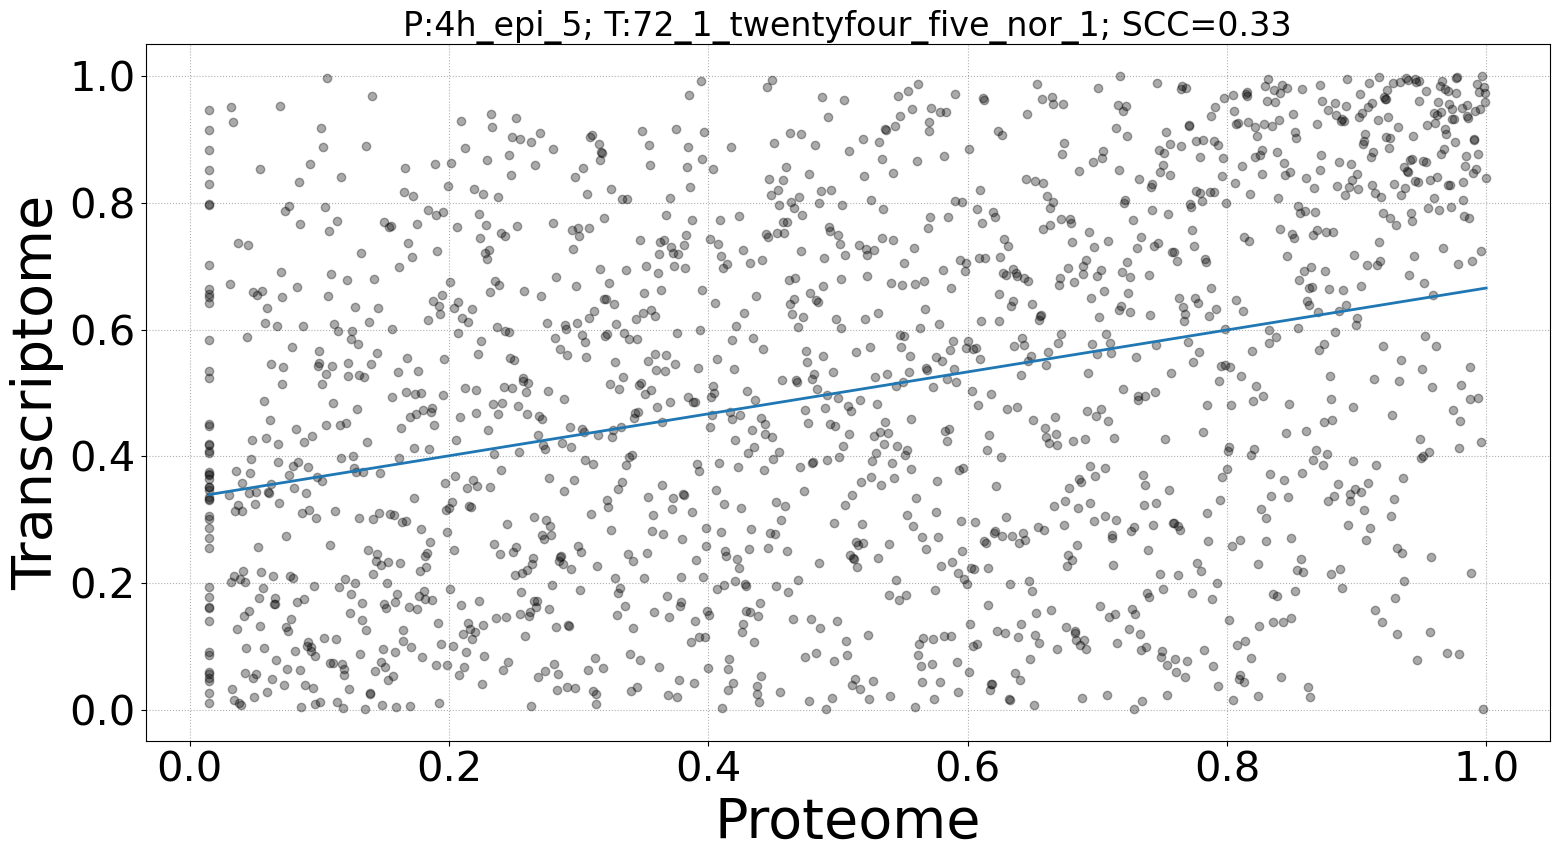

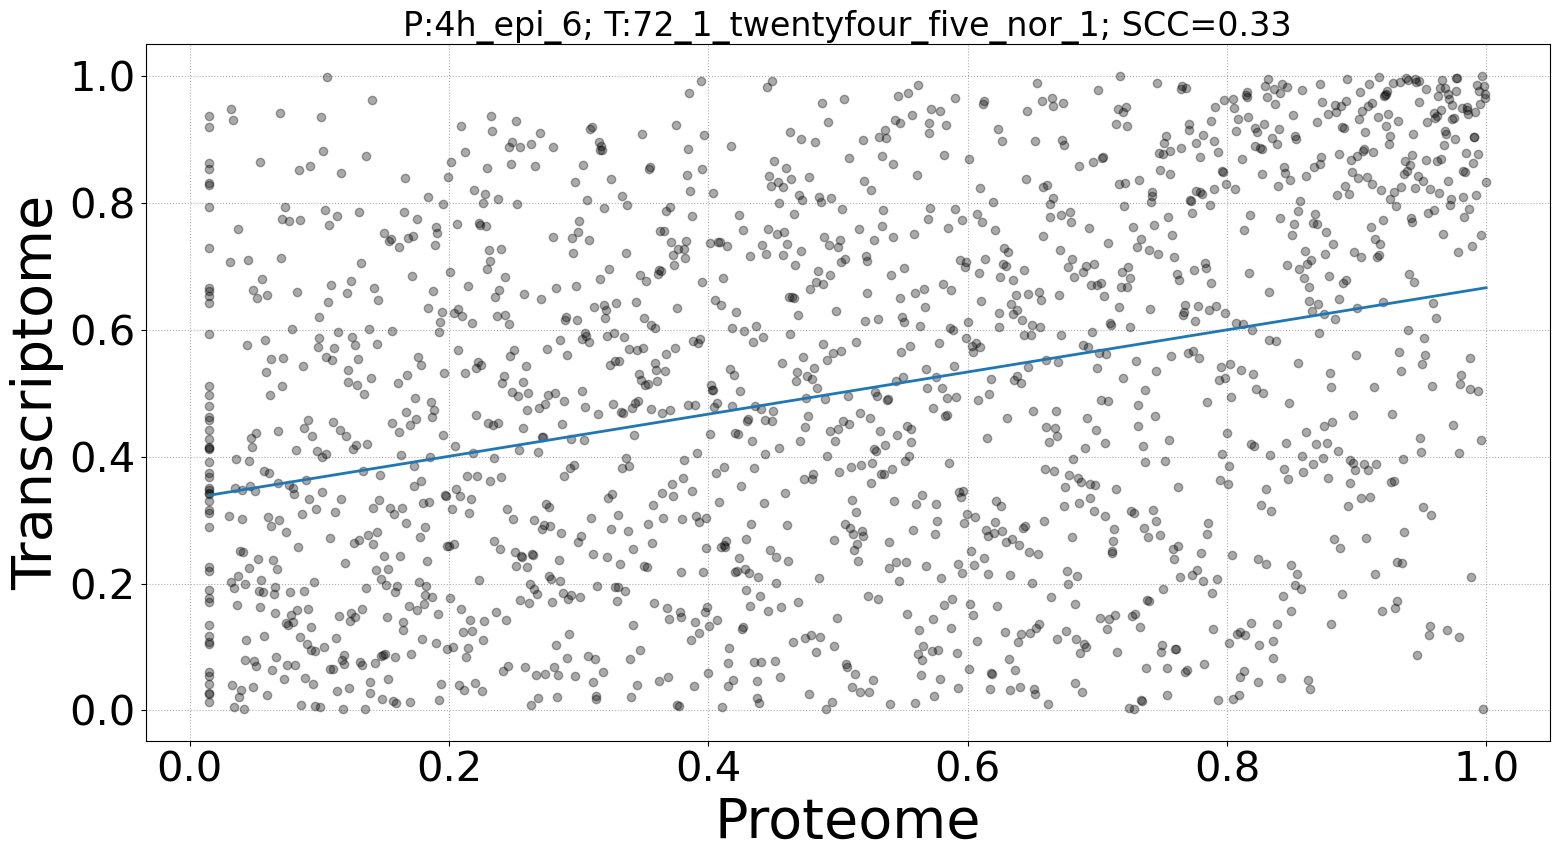

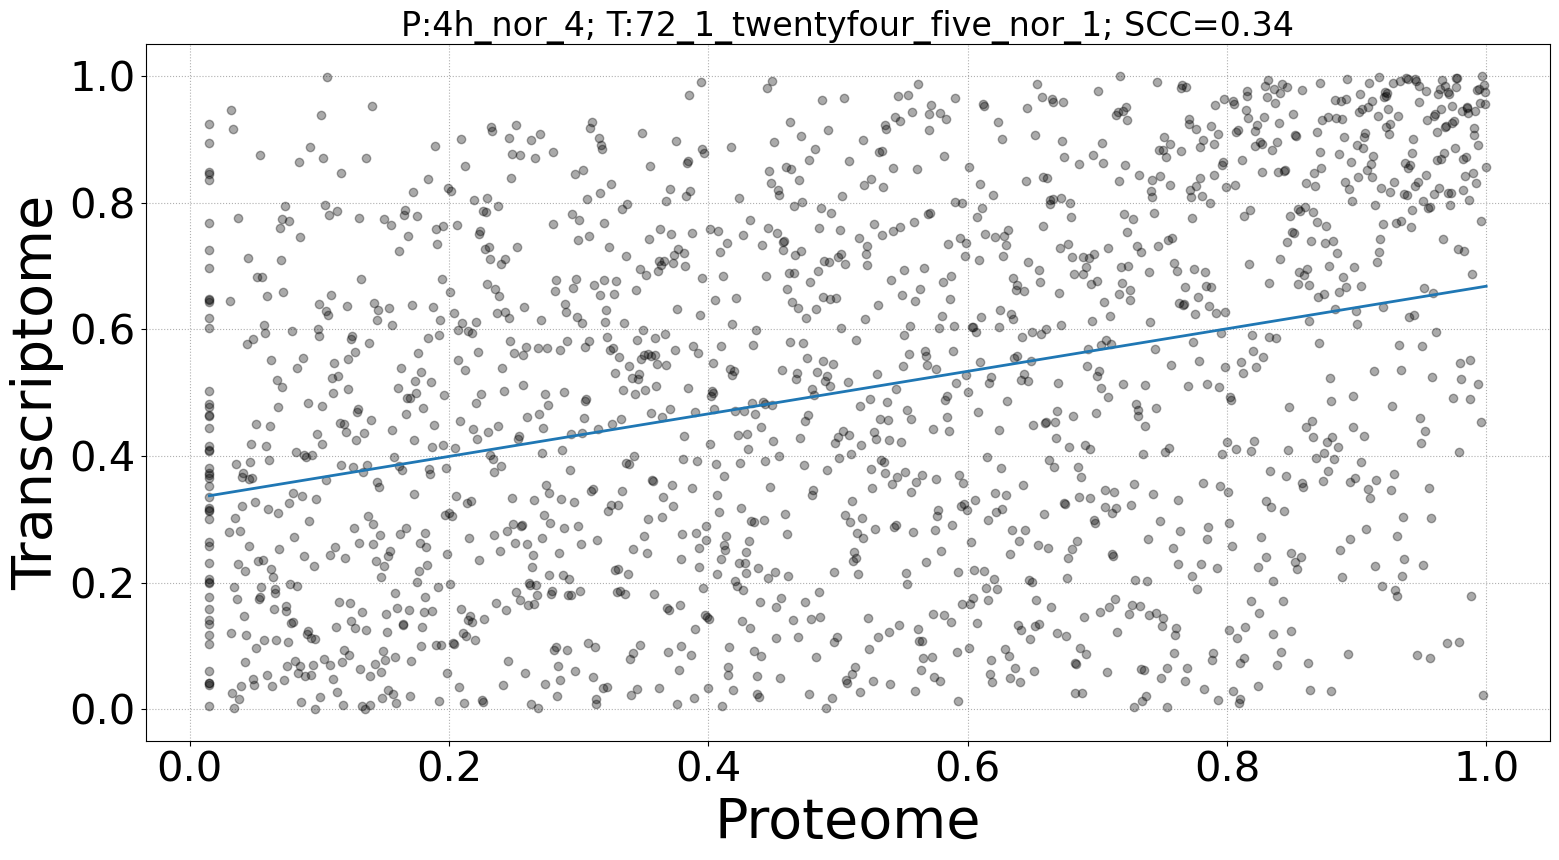

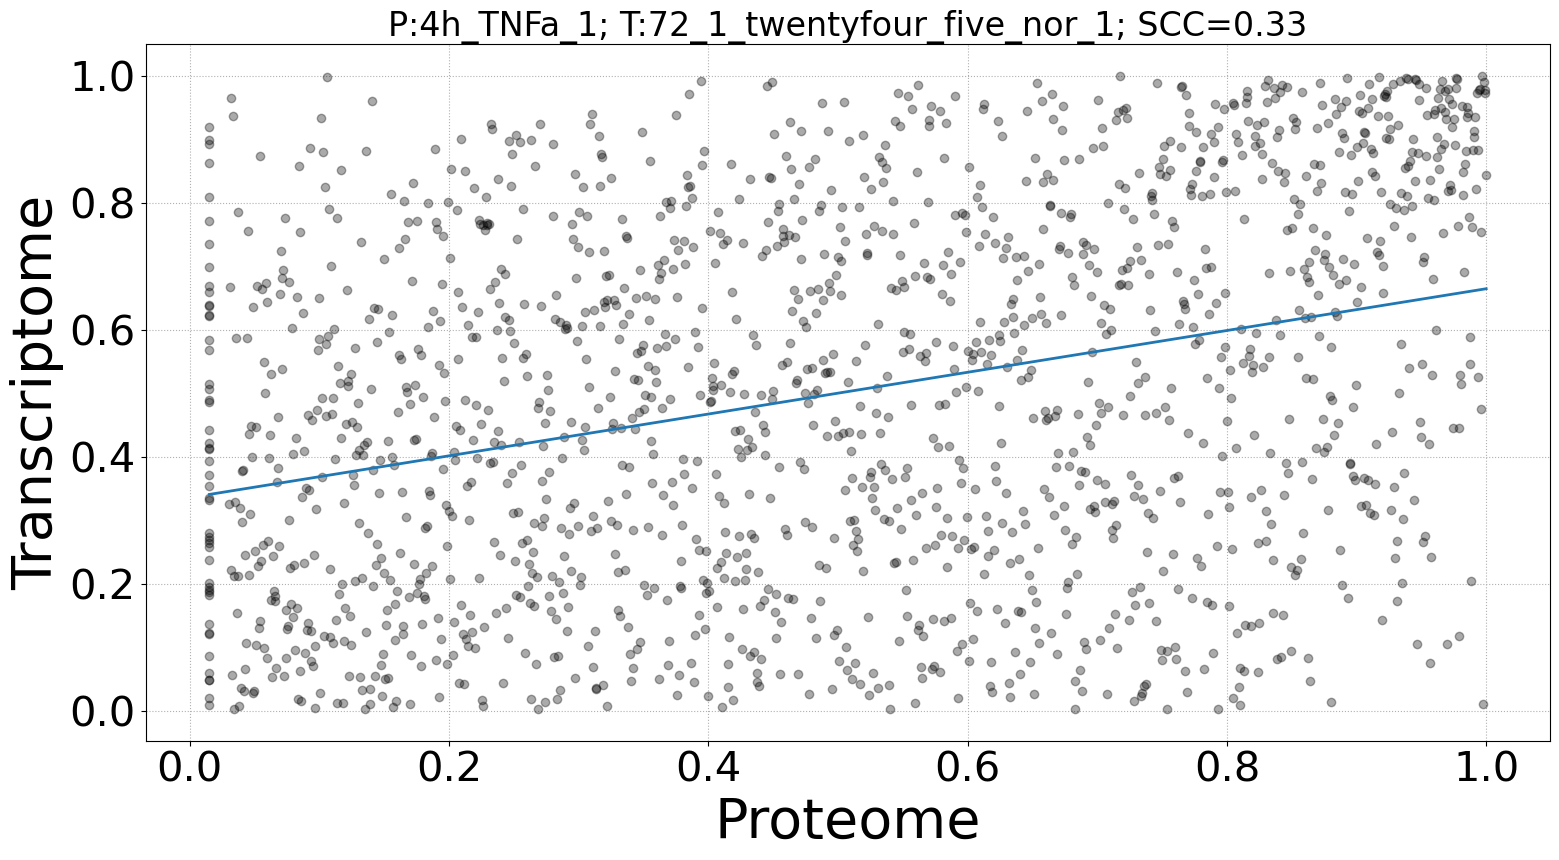

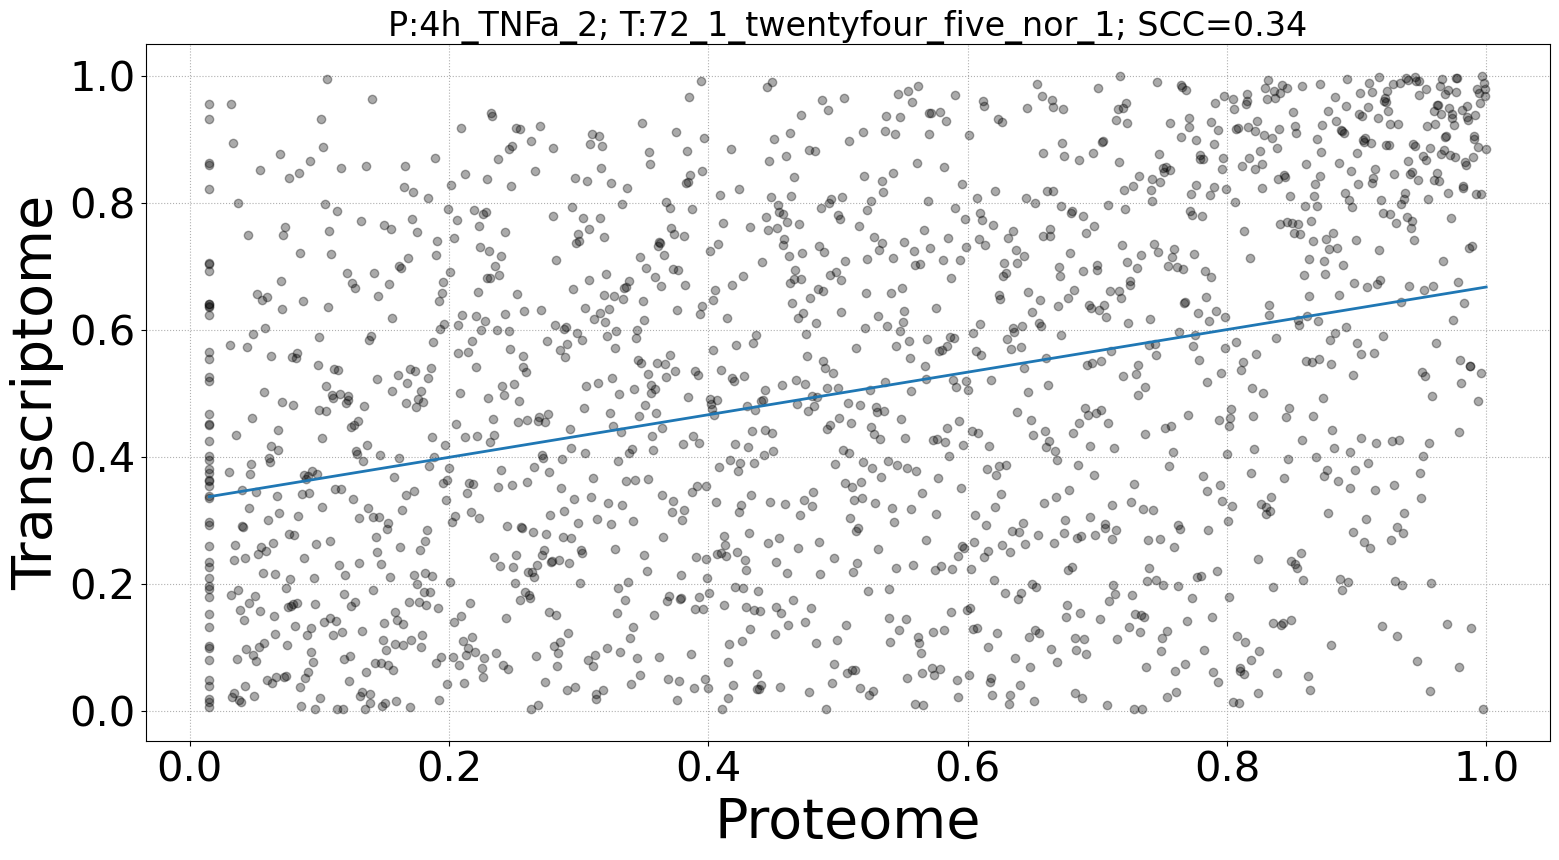

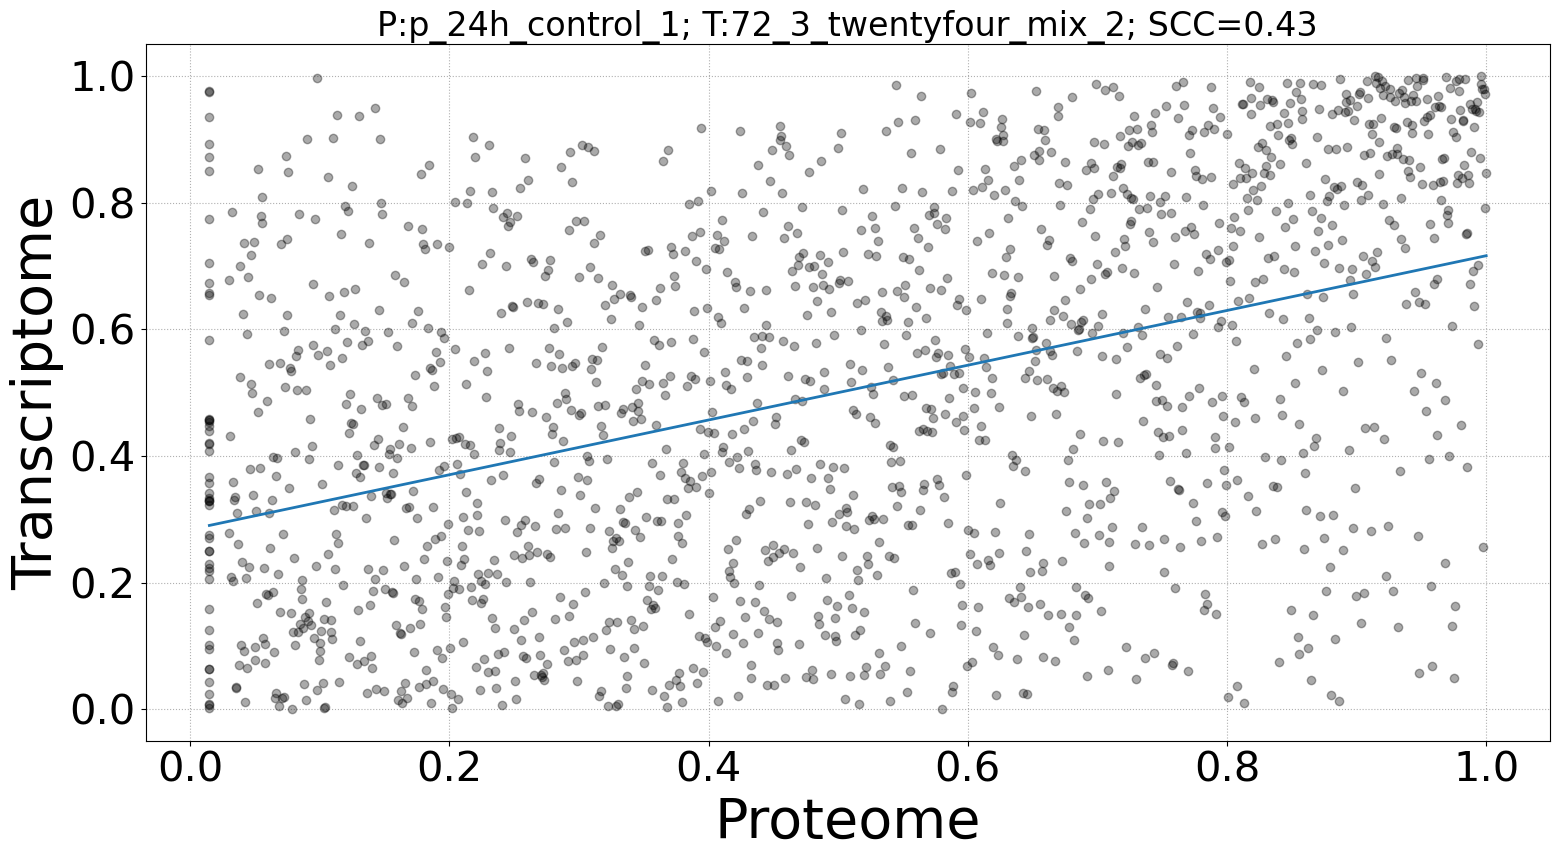

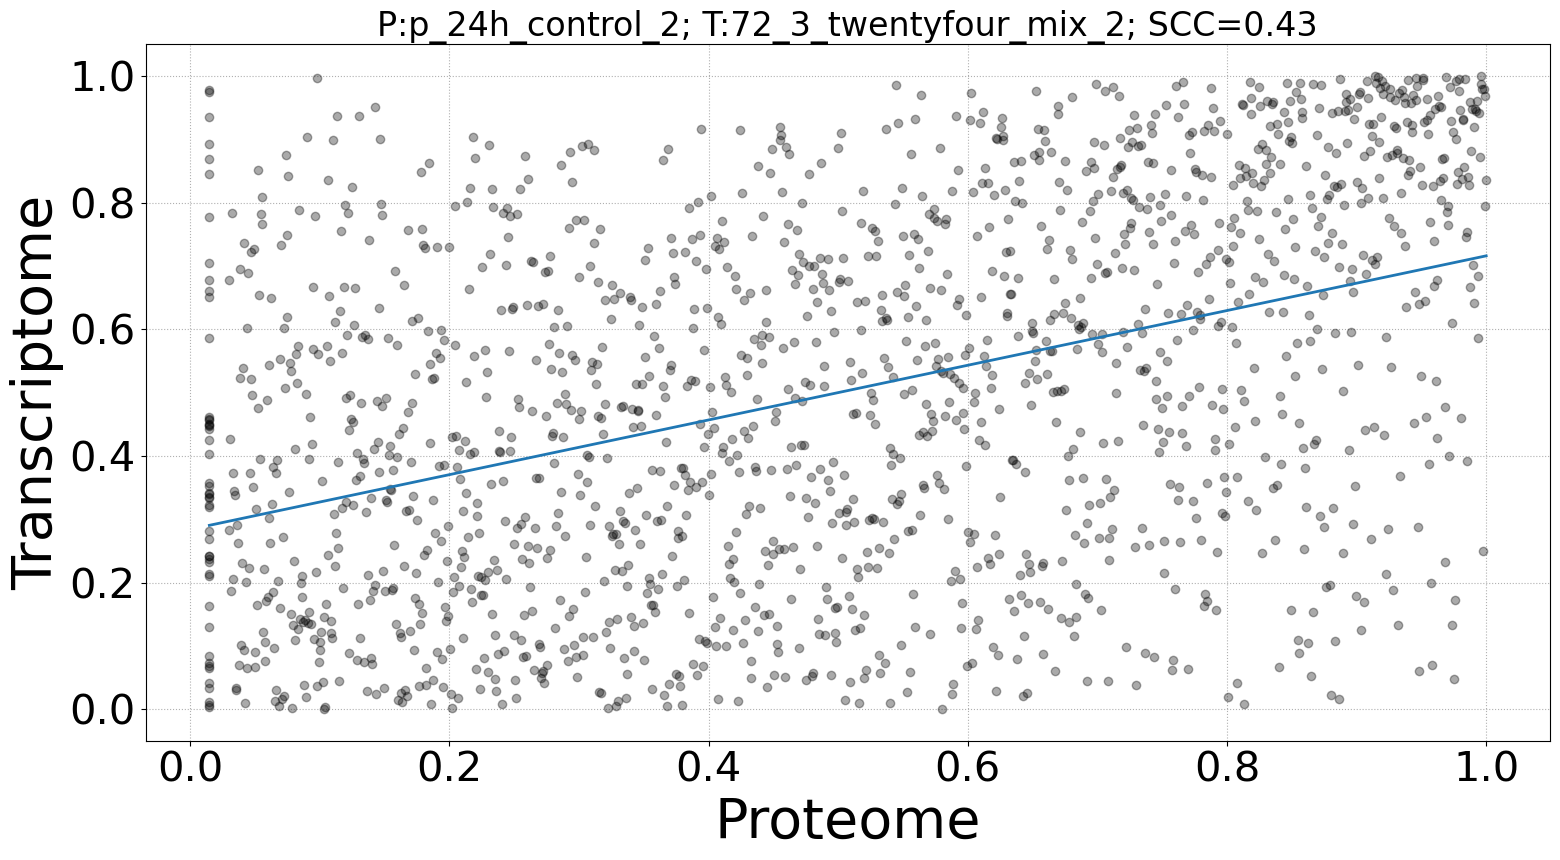

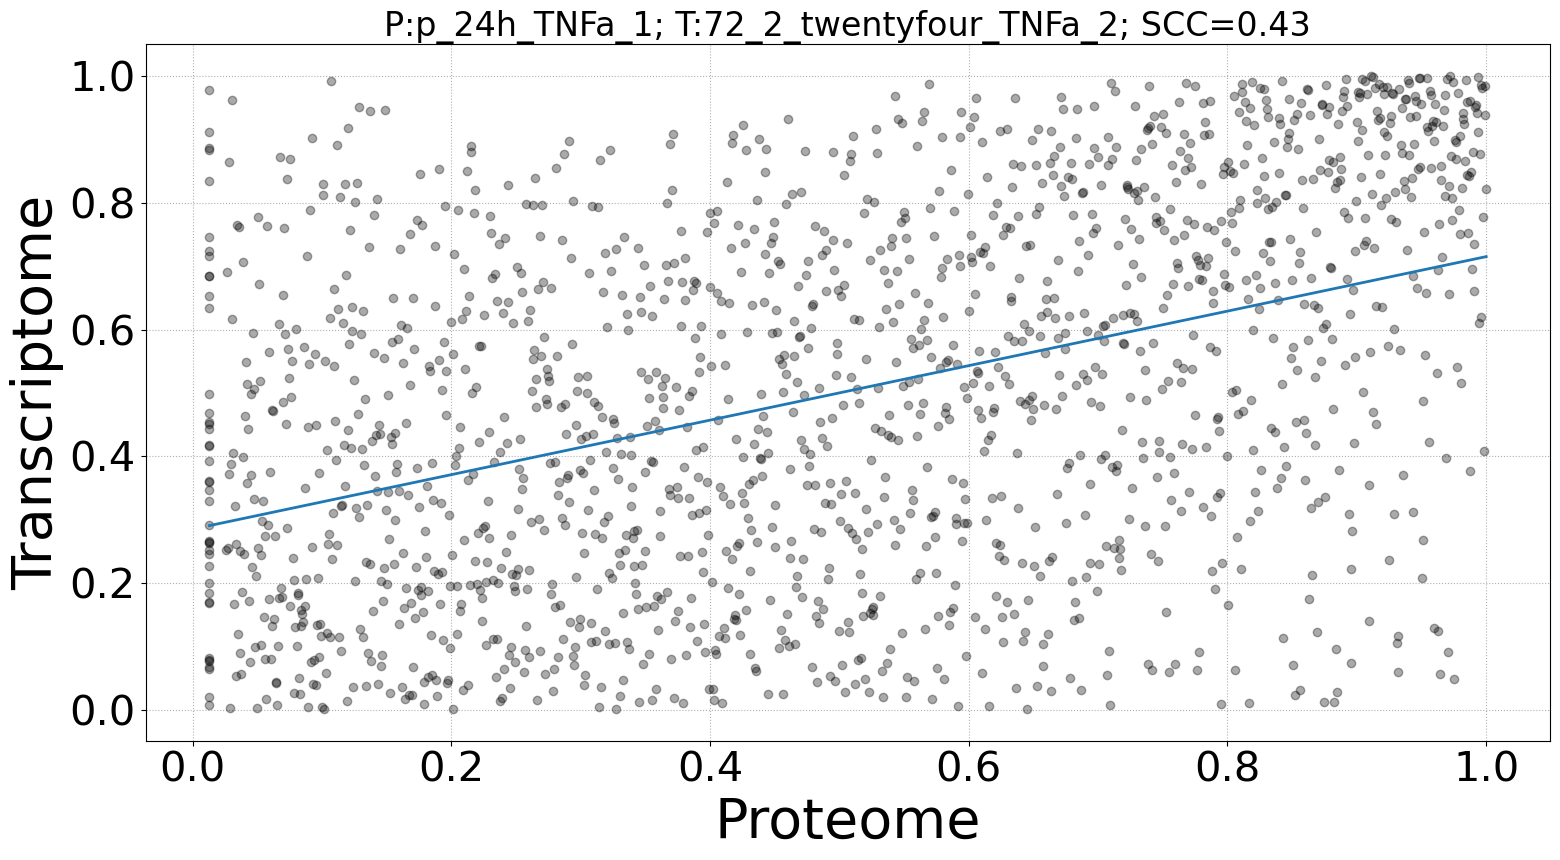

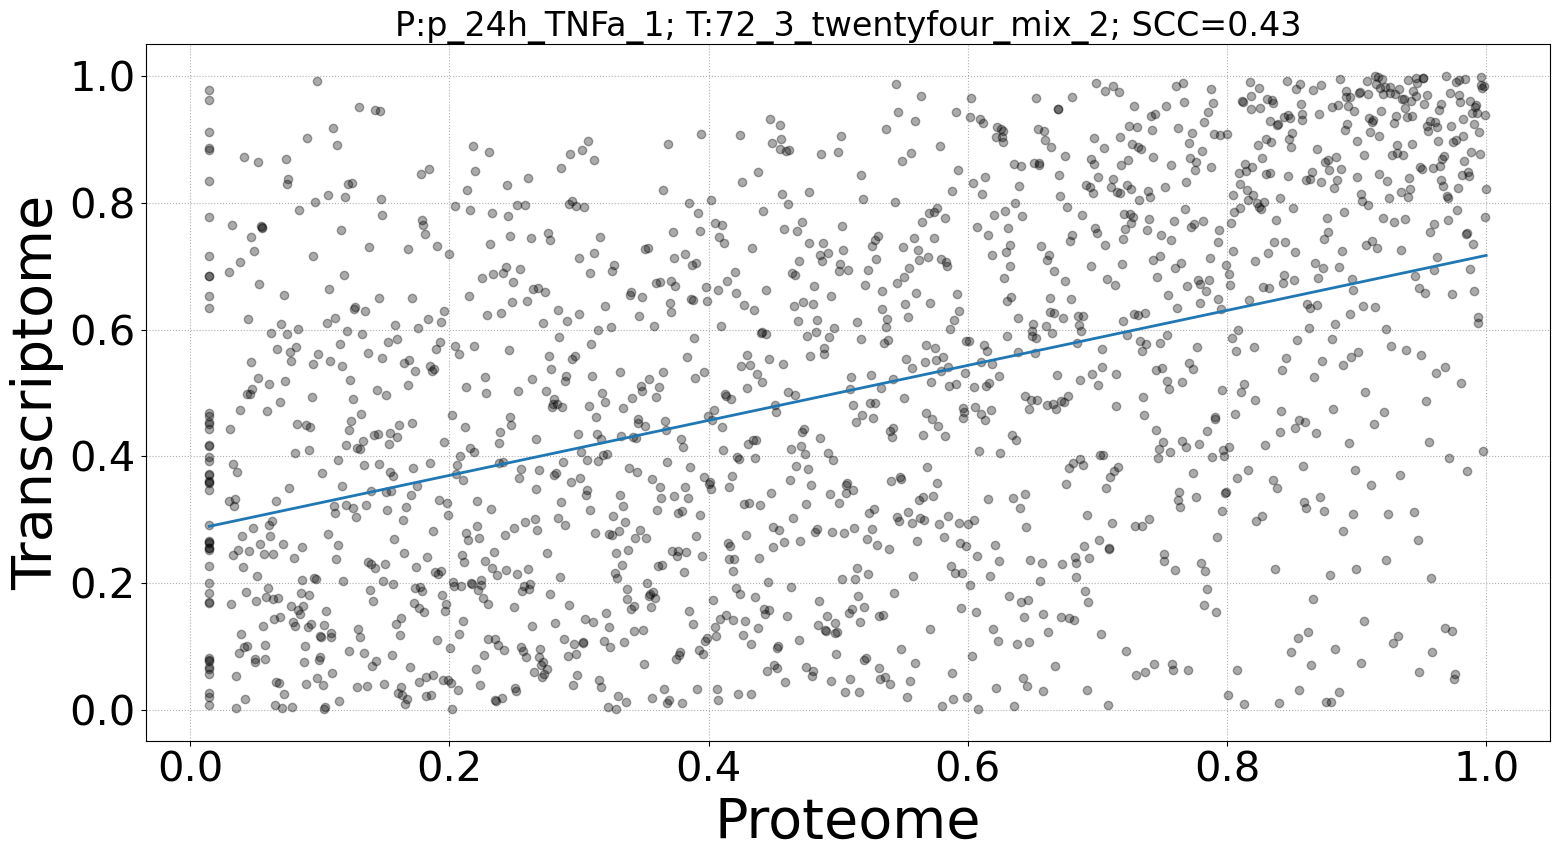

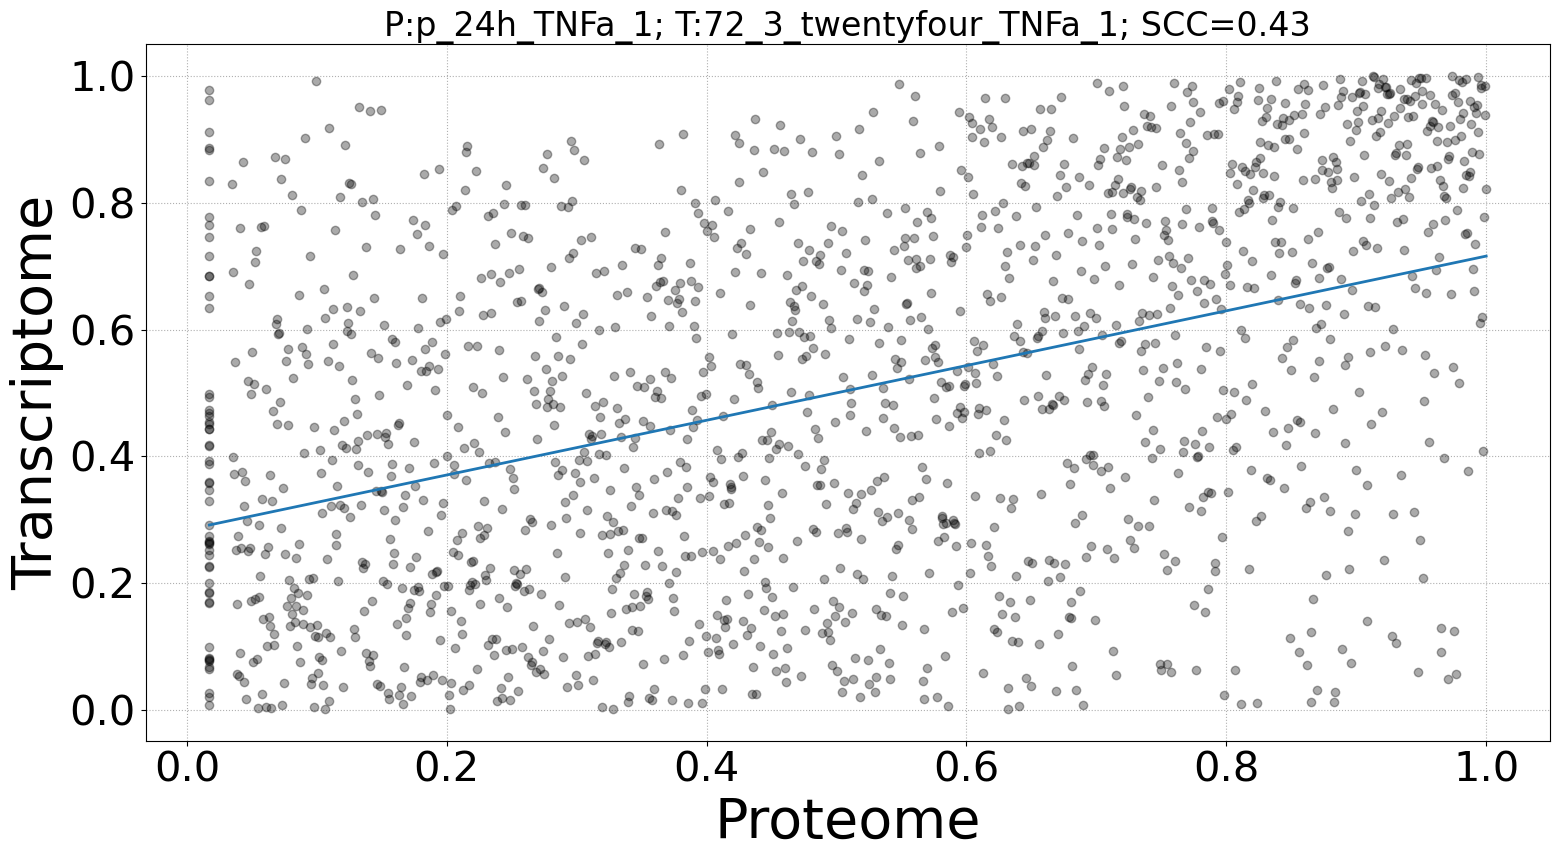

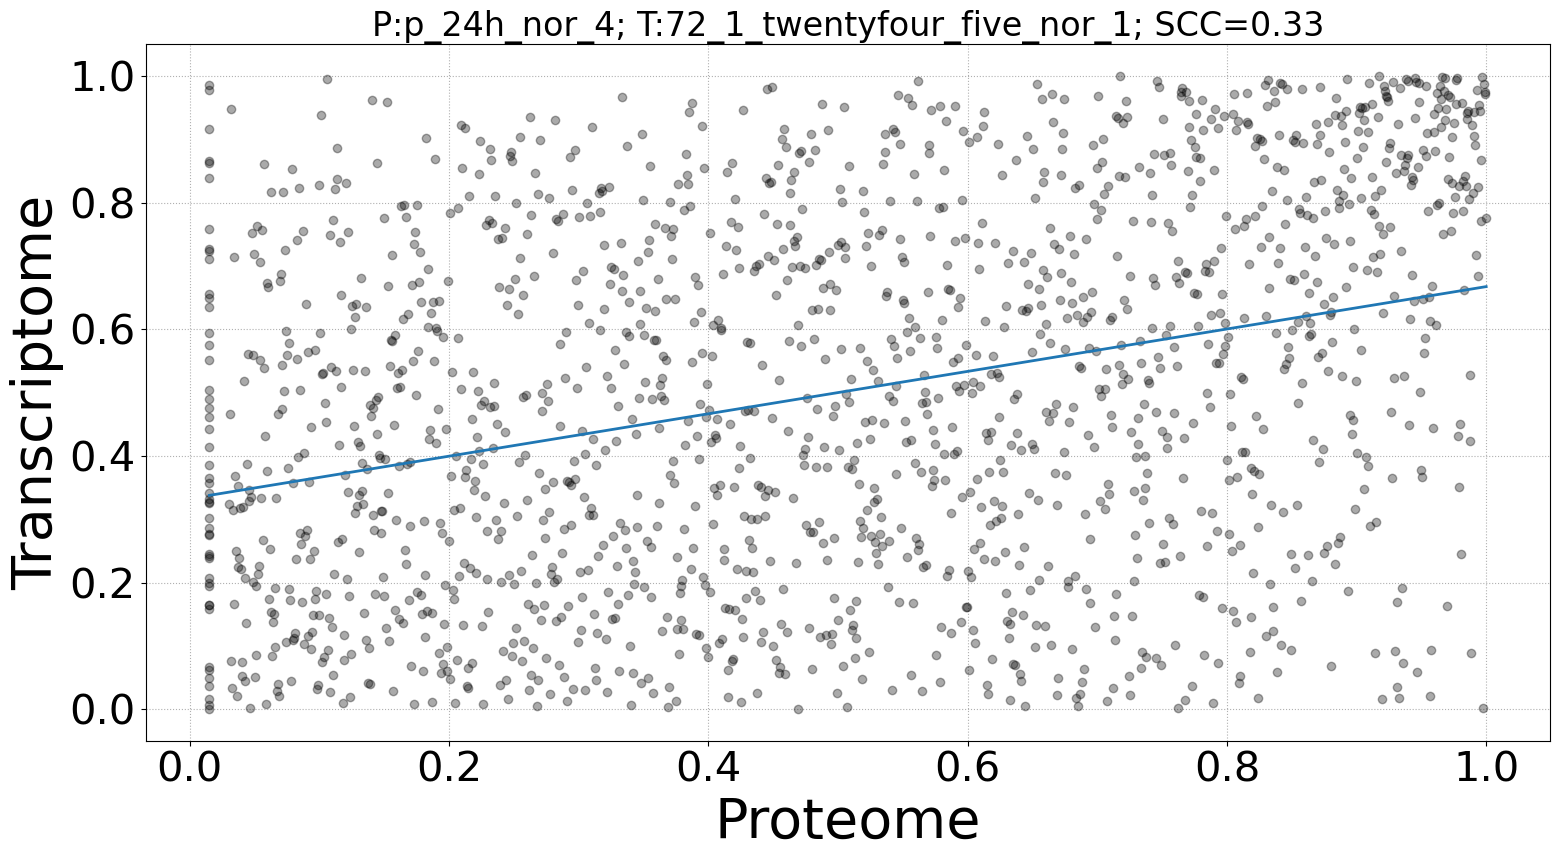

In [32]:
# just plotting
all_values = list(tdf.values.flatten())
all_values.sort(reverse=True)
top = all_values[4]
bottom = all_values[-6]

for proteome_condition in proteome.columns:
    for transcriptome_condition in selected_expression.columns:
        y = proteome.loc[:, proteome_condition]
        x = selected_expression.loc[:, transcriptome_condition]
        scc = scipy.stats.spearmanr(x, y)
        if scc[0] >= top or scc[0] <= bottom:
            
            rx = x.rank(pct=True)
            ry = y.rank(pct=True)
            
            matplotlib.pyplot.plot(rx, ry, 'o', color='black', alpha=1/3, mec=None)
            
            result = scipy.stats.linregress(rx, ry)
            floor = numpy.min(rx); ceiling = numpy.max(rx)
            model_floor = result.slope*floor + result.intercept
            model_ceiling = result.slope*ceiling + result.intercept
            matplotlib.pyplot.plot([floor, ceiling], [model_floor, model_ceiling], '-', lw=2, color='tab:blue')
            
            the_title='P:{}; T:{}; SCC={:.2f}'.format(proteome_condition, transcriptome_condition, scc[0])
            matplotlib.pyplot.title(the_title)
            matplotlib.pyplot.xlabel('Proteome')
            matplotlib.pyplot.ylabel('Transcriptome')
            matplotlib.pyplot.grid(ls=':')
            matplotlib.pyplot.tight_layout()
            
            matplotlib.pyplot.show()

In [33]:
proteome_colors = []
for element in tdf.index:
    if 'control' in element:
        proteome_colors.append('tab:gray')
    elif '_epi_' in element:
        proteome_colors.append('tab:orange')
    elif '_nor_' in element:
        proteome_colors.append('tab:purple')
    elif '_epinor_' in element:
        proteome_colors.append('tab:red')
    elif 'TNF' in element:
        proteome_colors.append('tab:green')
    else:
        raise ValueError('something not detected')

for i in range(len(tdf.index)):
    print(tdf.index[i], proteome_colors[i])

4h_epi_1 tab:orange
4h_epi_2 tab:orange
4h_epi_3 tab:orange
4h_epi_4 tab:orange
4h_epi_5 tab:orange
4h_epi_6 tab:orange
4h_control_1 tab:gray
4h_control_2 tab:gray
4h_control_3 tab:gray
4h_control_4 tab:gray
4h_control_5 tab:gray
4h_control_6 tab:gray
4h_nor_1 tab:purple
4h_nor_2 tab:purple
4h_nor_3 tab:purple
4h_nor_4 tab:purple
4h_nor_5 tab:purple
4h_nor_6 tab:purple
4h_epinor_1 tab:red
4h_epinor_2 tab:red
4h_epinor_3 tab:red
4h_epinor_4 tab:red
4h_TNFa_1 tab:green
4h_TNFa_2 tab:green
p_24h_control_1 tab:gray
p_24h_control_2 tab:gray
p_24h_control_3 tab:gray
p_24h_control_4 tab:gray
p_24h_control_5 tab:gray
p_24h_control_6 tab:gray
p_24h_TNFa_1 tab:green
p_24h_TNFa_2 tab:green
p_24h_TNFa_3 tab:green
p_24h_TNFa_4 tab:green
p_24h_TNFa_5 tab:green
p_24h_TNFa_6 tab:green
p_24h_epi_1 tab:orange
p_24h_epi_2 tab:orange
p_24h_nor_1 tab:purple
p_24h_nor_2 tab:purple
p_24h_nor_3 tab:purple
p_24h_nor_4 tab:purple
p_24h_epinor_1 tab:red
p_24h_epinor_2 tab:red
p_24h_epinor_3 tab:red
p_24h_epinor_

In [34]:
transcriptome_colors = []
for element in tdf.columns:
    if 'zero' in element:
        transcriptome_colors.append('tab:gray')
    elif 'epi' in element:
        transcriptome_colors.append('tab:orange')
    elif 'nor' in element:
        transcriptome_colors.append('tab:purple')
    elif 'mix' in element:
        transcriptome_colors.append('tab:red')
    elif 'TNF' in element:
        transcriptome_colors.append('tab:green')
    else:
        raise ValueError('something not detected')
        
for i in range(len(tdf.columns)):
    print(tdf.columns[i], transcriptome_colors[i])

72_2_four_zero_1 tab:gray
72_2_four_zero_2 tab:gray
72_2_four_five_epi_1 tab:orange
72_2_four_five_epi_2 tab:orange
72_2_four_five_nor_1 tab:purple
72_2_four_five_nor_2 tab:purple
72_2_four_mix_1 tab:red
72_2_four_mix_2 tab:red
72_2_four_TNFa_1 tab:green
72_2_four_TNFa_2 tab:green
72_2_twentyfour_zero_1 tab:gray
72_2_twentyfour_zero_2 tab:gray
72_2_twentyfour_five_epi_1 tab:orange
72_2_twentyfour_five_epi_2 tab:orange
72_2_twentyfour_five_nor_1 tab:purple
72_2_twentyfour_five_nor_2 tab:purple
72_2_twentyfour_mix_1 tab:red
72_2_twentyfour_mix_2 tab:red
72_2_twentyfour_TNFa_1 tab:green
72_2_twentyfour_TNFa_2 tab:green
72_3_four_zero_1 tab:gray
72_3_four_zero_2 tab:gray
72_3_four_five_epi_1 tab:orange
72_3_four_five_epi_2 tab:orange
72_3_four_five_nor_1 tab:purple
72_3_four_five_nor_2 tab:purple
72_3_four_mix_1 tab:red
72_3_four_mix_2 tab:red
72_3_four_TNFa_1 tab:green
72_3_four_TNFa_2 tab:green
72_3_twentyfour_zero_1 tab:gray
72_3_twentyfour_zero_2 tab:gray
72_3_twentyfour_five_epi_1 tab

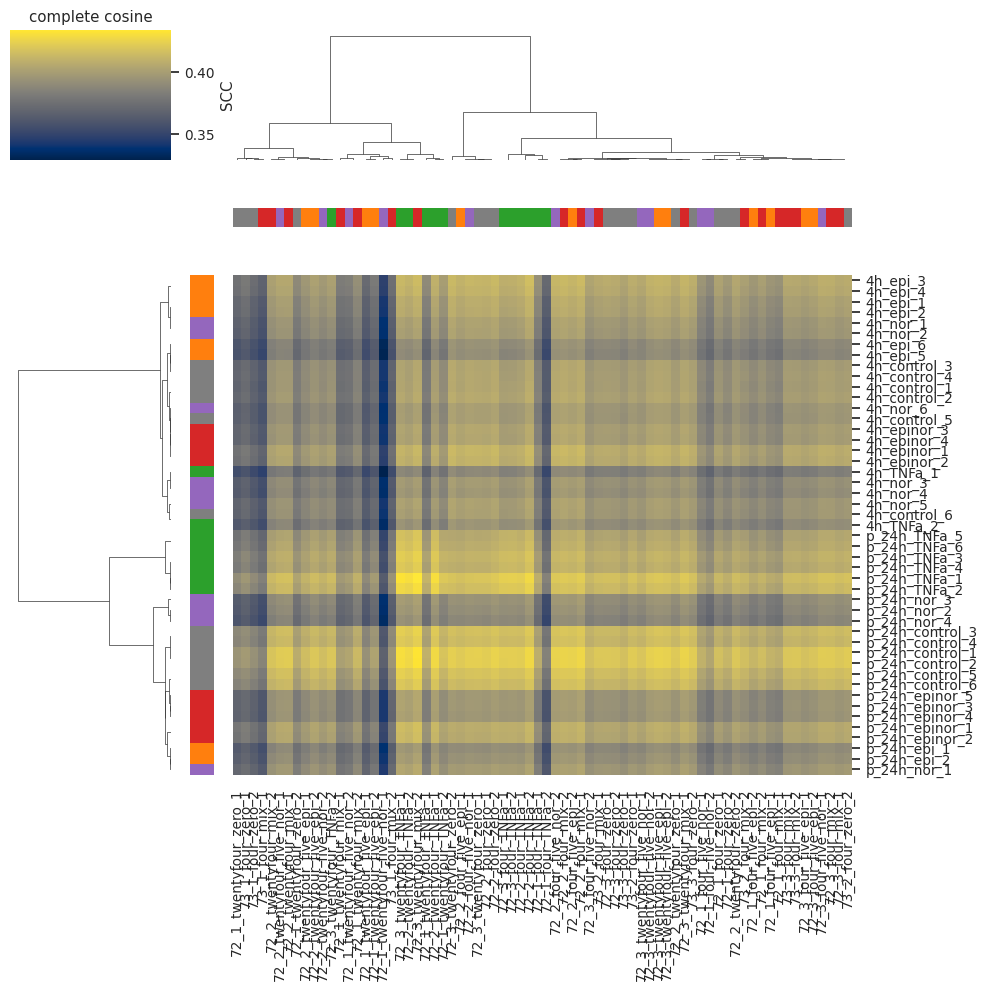

In [35]:
linkage_method = 'complete'
distance_metric = 'cosine'

seaborn.set(font_scale=0.9)
seaborn.clustermap(tdf, 
                   cmap='cividis', 
                   vmin=tdf.min().min(), vmax=tdf.max().max(), 
                   method=linkage_method, metric=distance_metric, 
                   cbar_kws={'label':'SCC'}, 
                   xticklabels=1, 
                   yticklabels=1,
                   row_colors=proteome_colors,
                   col_colors=transcriptome_colors
                  )

matplotlib.pyplot.title('{} {}'.format(linkage_method, distance_metric))
matplotlib.pyplot.xlabel('sd')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()